In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
data=pd.read_csv("/content/adult_with_headers.csv")

In [3]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
missing_values=data.isnull().sum()

In [5]:
missing_values

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [6]:
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [7]:
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [8]:
standard_scaled_data = pd.DataFrame(standard_scaler.fit_transform(data[numerical_cols]), columns=numerical_cols)
min_max_scaled_data = pd.DataFrame(min_max_scaler.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [9]:
print("Standard Scaled Data:")
print(standard_scaled_data.head())
print("Min-Max Scaled Data:")
print(min_max_scaled_data.head())

Standard Scaled Data:
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  
Min-Max Scaled Data:
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_week  

In [10]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding for categorical variables with fewer than 5 categories
one_hot_cols = ['sex', 'income']  # Example columns with fewer than 5 categories
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded_data = pd.DataFrame(one_hot_encoder.fit_transform(data[one_hot_cols]),
                                    columns=one_hot_encoder.get_feature_names_out(one_hot_cols))

print("One-Hot Encoded Data:")
print(one_hot_encoded_data.head())


One-Hot Encoded Data:
   sex_ Male  income_ >50K
0        1.0           0.0
1        1.0           0.0
2        1.0           0.0
3        1.0           0.0
4        0.0           0.0


In [11]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']
label_encoder = LabelEncoder()
for col in label_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Combine data
encoded_data = pd.concat([data, one_hot_encoded_data], axis=1)
print("Label Encoded Data:")
print(data[label_cols].head())


Label Encoded Data:
   workclass  education  marital_status  occupation  relationship  race  \
0          7          9               4           1             1     4   
1          6          9               2           4             0     4   
2          4         11               0           6             1     4   
3          4          1               2           6             0     2   
4          4          9               2          10             5     2   

   native_country  
0              39  
1              39  
2              39  
3              39  
4               5  


In [12]:
# Feature Engineering: Creating new features
# Example: Ratio of capital_gain to capital_loss and total working hours per year
data['capital_gain_loss_ratio'] = data['capital_gain'] / (data['capital_loss'] + 1)  # Avoid division by zero
data['hours_per_year'] = data['hours_per_week'] * 52

# Log Transformation for a skewed feature (e.g., capital_gain)
import numpy as np
data['log_capital_gain'] = np.log1p(data['capital_gain'])  # Log transform to handle skewness

print("New Features:")
print(data[['capital_gain_loss_ratio', 'hours_per_year', 'log_capital_gain']].head())


New Features:
   capital_gain_loss_ratio  hours_per_year  log_capital_gain
0                   2174.0            2080          7.684784
1                      0.0             676          0.000000
2                      0.0            2080          0.000000
3                      0.0            2080          0.000000
4                      0.0            2080          0.000000


<ipython-input-13-88ca37208e49>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_cleaned.corr()


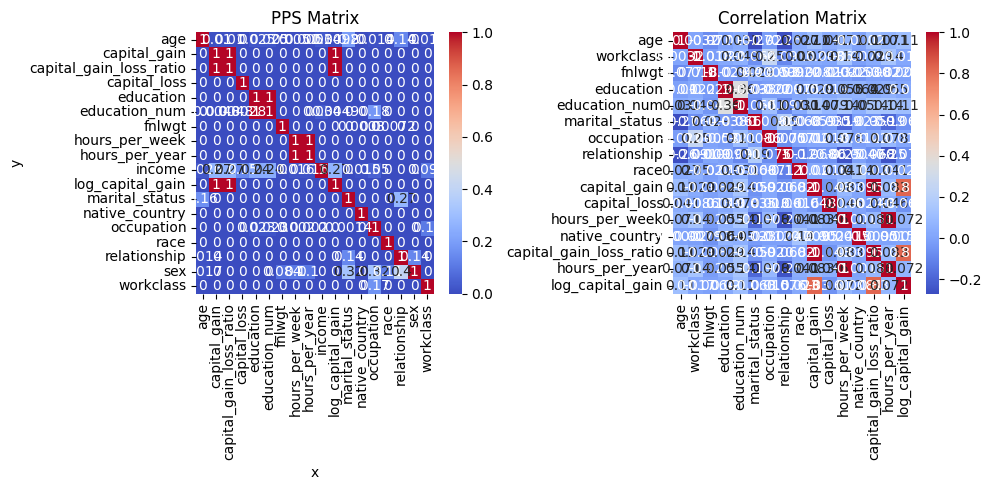

In [13]:
!pip install ppscore # This line installs the ppscore package
from sklearn.ensemble import IsolationForest
import ppscore as pps  # Now, ppscore should import without errors
import seaborn as sns
import matplotlib.pyplot as plt

# Isolation Forest to detect and remove outliers
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(data[numerical_cols])
data_cleaned = data[outliers == 1]  # Keep only non-outliers

# Apply PPS (Predictive Power Score)
pps_matrix = pps.matrix(data_cleaned)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# Compare with Correlation Matrix
correlation_matrix = data_cleaned.corr()

# Visualize PPS matrix vs Correlation matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(pps_matrix, annot=True, cmap="coolwarm")
plt.title("PPS Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

plt.tight_layout()
plt.show()

print("Data after removing outliers:", data_cleaned.shape)

Data after removing outliers: (32235, 18)
